In [36]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [37]:
3+2

5

# Apprentissage non supervisé - Villes

In [38]:
## Importer jeu de données avec Pandas
datavilles = pd.read_csv('./villes.csv', sep=';')

In [39]:
## Visualiser les données : On a choisis 3 lignes
datavilles.head(3)
#datavilles.shape



,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3


In [40]:
X = datavilles.ix[:, 1:13].values
labels = datavilles.ix[:, 0].values
print (labels)

['ajac' 'ange' 'ango' 'besa' 'biar' 'bord' 'bres' 'cler' 'dijo' 'embr'
 'gren' 'lill' 'limo' 'lyon' 'mars' 'mont' 'nanc' 'nant' 'nice' 'nime'
 'orle' 'pari' 'perp' 'reim' 'renn' 'roue' 'stqu' 'stra' 'toul' 'tlse'
 'tour' 'vich']


In [41]:
labels

array(['ajac', 'ange', 'ango', 'besa', 'biar', 'bord', 'bres', 'cler',
       'dijo', 'embr', 'gren', 'lill', 'limo', 'lyon', 'mars', 'mont',
       'nanc', 'nant', 'nice', 'nime', 'orle', 'pari', 'perp', 'reim',
       'renn', 'roue', 'stqu', 'stra', 'toul', 'tlse', 'tour', 'vich'],
      dtype=object)

## ACP

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
s=StandardScaler()
X=s.fit_transform(X)
pca = PCA(n_components=12)
pca.fit(X)
print(pca.components_[:2,:])
sum(pca.explained_variance_ratio_[:2])

[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


0.9898879529268559

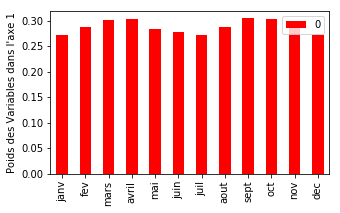

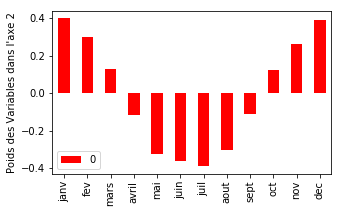

In [15]:
fea=datavilles.columns[1:]
components = pd.DataFrame(pca.components_[0,:],index =fea) 
fig, ax = plt.subplots(figsize = (5,3))
components.plot(ax = ax, kind = 'bar',align = "center", color='red')
ax.set_ylabel("Poids des Variables dans l'axe 1") 

components = pd.DataFrame(pca.components_[1,:],index =fea) 
fig, ax = plt.subplots(figsize = (5,3))
components.plot(ax = ax, kind = 'bar',align = "center", color='red')
ax.set_ylabel("Poids des Variables dans l'axe 2") 


plt.show()



## Visualisation

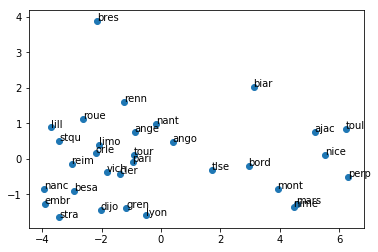

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2),textcoords='offset points')

plt.show()

# Apprentissage non supervisé - crimes

In [14]:
datacrimes = pd.read_csv('./crimes.csv', sep=';')
datacrimes.head(3)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5


## ACP

In [23]:
X = datacrimes.ix[:, 1:8].values
labels = datacrimes.ix[:, 0].values
pca = PCA(n_components = 3)
pca.fit(StandardScaler().fit_transform(X))
print(pca.components_[:2,:])
sum(pca.explained_variance_ratio_[:2])

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]]


0.764811620190864

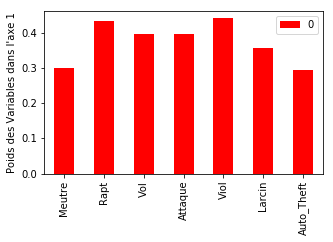

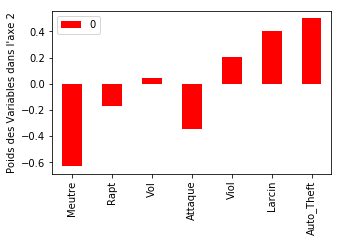

In [25]:
fea=datacrimes.columns[1:]
components = pd.DataFrame(pca.components_[0,:],index =fea) 
fig, ax = plt.subplots(figsize = (5,3))
components.plot(ax = ax, kind = 'bar',align = "center", color='red')
ax.set_ylabel("Poids des Variables dans l'axe 1") 

components = pd.DataFrame(pca.components_[1,:],index =fea) 
fig, ax = plt.subplots(figsize = (5,3))
components.plot(ax = ax, kind = 'bar',align = "center", color='red')
ax.set_ylabel("Poids des Variables dans l'axe 2") 


plt.show()




## Visualisation

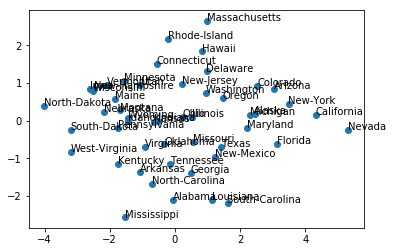

In [26]:
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2),textcoords='offset points')

plt.show()

# Clustering des données de température

## Kmeans

In [27]:
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.colors as col

In [28]:
X = datavilles.ix[:, 1:13].values
labels = datavilles.ix[:, 0].values
labels
Km = KMeans(n_clusters=2).fit(X)
y_pred = Km.predict(X)
print(y_pred)

[0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1]


### Visualisation

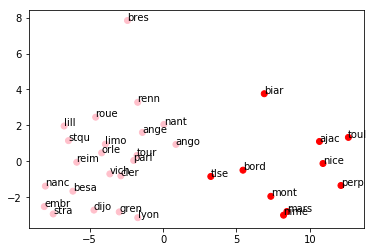

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=col.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()

### Choix du nombre de clusters pour K-means

In [30]:
from sklearn import metrics

for i in np.arange(2, 6):
    y_pred = KMeans(n_clusters=i).fit_predict(X)
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i, metrics.silhouette_score(X, y_pred,metric='euclidean')))
    print()
    

La silhouette index pour 2 classes est 0.618116

La silhouette index pour 3 classes est 0.409120

La silhouette index pour 4 classes est 0.361240

La silhouette index pour 5 classes est 0.317142



## CAH

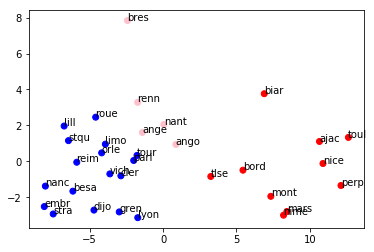

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
y_pred = AgglomerativeClustering(n_clusters=3,linkage="ward", affinity='euclidean').fit_predict(X)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap=col.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-0.2, 0.2),
        textcoords='offset points')

plt.show()


### Choix du nombre de clusters pour CAH

In [35]:
from sklearn import metrics

for i in np.arange(2, 6):
    y_pred = AgglomerativeClustering(n_clusters=i,linkage="ward", affinity='euclidean').fit_predict(X)
    print('La silhouette index pour {0:d} classes est {1:3f}'.format(i, metrics.silhouette_score(X, y_pred,metric='euclidean')))
    print()

La silhouette index pour 2 classes est 0.618116

La silhouette index pour 3 classes est 0.406313

La silhouette index pour 4 classes est 0.370212

La silhouette index pour 5 classes est 0.300232

